In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
english = open('./data/english.txt').read()
finnish = open('./data/finnish.txt').read()
german = open('./data/german.txt').read()
italian = open('./data/italian.txt').read()
polish = open('./data/polish.txt').read()
spanish = open('./data/spanish.txt').read()

In [3]:
english[:2000]

"Harry Potter and the Sorcerer's Stone\n\n\nCHAPTER ONE\n\nTHE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.\n\nMr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. The Dursleys had a small son called Dudley and in their\nopinion there was no finer boy anywhere.\n\nThe Dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. They didn't\nthink they could bear it if anyone found ou

In [4]:
def to_df(txt, label):
    parsedData = txt.split('\n\n')
    df = pd.DataFrame({'text':parsedData,
                      'label': label})

    return df

In [5]:
dataframes = [to_df(english, 'english'), to_df(finnish, 'finnish'), to_df(german, 'german'), to_df(polish, 'polish'), to_df(italian, 'italian'),to_df(spanish, 'spanish')]

In [6]:
df = pd.concat(dataframes)

In [7]:
df

,text,label
0,Harry Potter and the Sorcerer's Stone,english
1,\nCHAPTER ONE,english
2,THE BOY WHO LIVED,english
3,"Mr. and Mrs. Dursley, of number four, Privet D...",english
4,Mr. Dursley was the director of a firm called ...,english
...,...,...
14,El Romanticismo inició la interpretación figur...,spanish
15,"Durante el siglo xix, el personaje cervantino ...",spanish
16,La primera parte supone un avance considerable...,spanish
17,La segunda parte es más barroca que manierista...,spanish


In [8]:
categories = ['english', 'finnish', 'german', 'polish', 'italian', 'spanish']
values = []
for lab in categories:
    values.append(len(df[df['label'] == str(lab)]))

In [9]:
values

[10264, 19, 14, 401, 1424, 19]

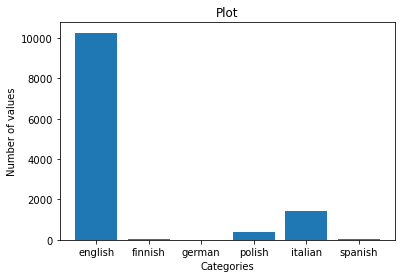

In [10]:
import matplotlib.pyplot as plt

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Number of values')
plt.title('Plot')

plt.show()

In [11]:
print("Number of null in label: {}".format(df['label'].isnull().sum()))
print("Number of null in text: {}".format(df['text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [12]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
df

,text,label
0,Harry Potter and the Sorcerer's Stone,english
1,\nCHAPTER ONE,english
2,THE BOY WHO LIVED,english
3,"Mr. and Mrs. Dursley, of number four, Privet D...",english
4,Mr. Dursley was the director of a firm called ...,english
...,...,...
14,El Romanticismo inició la interpretación figur...,spanish
15,"Durante el siglo xix, el personaje cervantino ...",spanish
16,La primera parte supone un avance considerable...,spanish
17,La segunda parte es más barroca que manierista...,spanish


In [14]:
def clean_text(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    text_nopunct = text_nopunct.replace('\n', "")
    no_num = "".join([char for char in text_nopunct if char not in '0123456789ˇ'])
    low_text = no_num.lower()
    tokens = re.split('\W+', low_text)
    return tokens

In [15]:
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))

In [16]:
df.head()

,text,label,clean_text
0,Harry Potter and the Sorcerer's Stone,english,"[harry, potter, and, the, sorcerers, stone]"
1,\nCHAPTER ONE,english,"[chapter, one]"
2,THE BOY WHO LIVED,english,"[the, boy, who, lived]"
3,"Mr. and Mrs. Dursley, of number four, Privet D...",english,"[mr, and, mrs, dursley, of, number, four, priv..."
4,Mr. Dursley was the director of a firm called ...,english,"[mr, dursley, was, the, director, of, a, firm,..."


In [17]:
import nltk

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [18]:
dataframes=[]
for language in categories:
    if language == 'polish':
        stopword = []
    else:
        stopword = nltk.corpus.stopwords.words(str(language))
    dataframes.append(df.loc[df['label'] == str(language)]['clean_text'].apply(lambda x: remove_stopwords(x)))

In [19]:
dataframes = pd.concat(dataframes)

In [20]:
df['clean_data'] = dataframes 

In [21]:
df.head()

,text,label,clean_text,clean_data
0,Harry Potter and the Sorcerer's Stone,english,"[harry, potter, and, the, sorcerers, stone]","[harry, potter, sorcerers, stone]"
1,\nCHAPTER ONE,english,"[chapter, one]","[chapter, one]"
2,THE BOY WHO LIVED,english,"[the, boy, who, lived]","[boy, lived]"
3,"Mr. and Mrs. Dursley, of number four, Privet D...",english,"[mr, and, mrs, dursley, of, number, four, priv...","[mr, mrs, dursley, number, four, privet, drive..."
4,Mr. Dursley was the director of a firm called ...,english,"[mr, dursley, was, the, director, of, a, firm,...","[mr, dursley, director, firm, called, grunning..."


## Lemmatizer

In [22]:
wn = nltk.WordNetLemmatizer()

In [23]:
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text

In [24]:
df['tokens'] = df['clean_text'].apply(lambda x: lemmatizing(x))
df.head(10)

,text,label,clean_text,clean_data,tokens
0,Harry Potter and the Sorcerer's Stone,english,"[harry, potter, and, the, sorcerers, stone]","[harry, potter, sorcerers, stone]","[harry, potter, and, the, sorcerer, stone]"
1,\nCHAPTER ONE,english,"[chapter, one]","[chapter, one]","[chapter, one]"
2,THE BOY WHO LIVED,english,"[the, boy, who, lived]","[boy, lived]","[the, boy, who, lived]"
3,"Mr. and Mrs. Dursley, of number four, Privet D...",english,"[mr, and, mrs, dursley, of, number, four, priv...","[mr, mrs, dursley, number, four, privet, drive...","[mr, and, mr, dursley, of, number, four, prive..."
4,Mr. Dursley was the director of a firm called ...,english,"[mr, dursley, was, the, director, of, a, firm,...","[mr, dursley, director, firm, called, grunning...","[mr, dursley, wa, the, director, of, a, firm, ..."
5,"The Dursleys had everything they wanted, but t...",english,"[the, dursleys, had, everything, they, wanted,...","[dursleys, everything, wanted, also, secret, a...","[the, dursleys, had, everything, they, wanted,..."
6,"When Mr. and Mrs. Dursley woke up on the dull,...",english,"[when, mr, and, mrs, dursley, woke, up, on, th...","[mr, mrs, dursley, woke, dull, gray, tuesday, ...","[when, mr, and, mr, dursley, woke, up, on, the..."
7,"None of them noticed a large, tawny owl flutte...",english,"[none, of, them, noticed, a, large, tawny, owl...","[none, noticed, large, tawny, owl, flutter, pa...","[none, of, them, noticed, a, large, tawny, owl..."
8,"At half past eight, Mr. Dursley picked up his ...",english,"[at, half, past, eight, mr, dursley, picked, u...","[half, past, eight, mr, dursley, picked, brief...","[at, half, past, eight, mr, dursley, picked, u..."
9,It was on the corner of the street that he not...,english,"[it, was, on, the, corner, of, the, street, th...","[corner, street, noticed, first, sign, ofsomet...","[it, wa, on, the, corner, of, the, street, tha..."


In [25]:
del df['clean_data']
del df['clean_text']
del df['text']

In [26]:
df['text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df

,label,tokens,text
0,english,"[harry, potter, and, the, sorcerer, stone]",harry potter and the sorcerer stone
1,english,"[chapter, one]",chapter one
2,english,"[the, boy, who, lived]",the boy who lived
3,english,"[mr, and, mr, dursley, of, number, four, prive...",mr and mr dursley of number four privet drive ...
4,english,"[mr, dursley, wa, the, director, of, a, firm, ...",mr dursley wa the director of a firm called gr...
...,...,...,...
14,spanish,"[el, romanticismo, inició, la, interpretación,...",el romanticismo inició la interpretación figur...
15,spanish,"[durante, el, siglo, xix, el, personaje, cerva...",durante el siglo xix el personaje cervantino s...
16,spanish,"[la, primera, parte, supone, un, avance, consi...",la primera parte supone un avance considerable...
17,spanish,"[la, segunda, parte, e, más, barroca, que, man...",la segunda parte e más barroca que manierista ...


In [27]:
from sklearn.utils import shuffle
df = shuffle(df)

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

## Tokenization

In [29]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42)

In [31]:
from torchtext.data.utils import get_tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
max_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_tr = pad_sequences(X_train_seq, maxlen=max_length)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_te = pad_sequences(X_test_seq, maxlen=max_length)

In [32]:
y_train.size

8134

In [33]:
torch.tensor(np.array(X_tr)).shape

torch.Size([8134, 100])

## CNN - model

In [34]:
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(np.array(X_tr[:len(y_train)])),
    torch.tensor(list(y_train))
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(np.array(X_te[:len(y_test)])),
    torch.tensor(list(y_test))
)

In [35]:
class CNN(nn.Module):
    def __init__(self, vocabulary_size, embedding_size, kernel_number, kernel_sizes, output_size, dropout_rate):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, embedding_size)

        self.convolution_layers = nn.ModuleList([nn.Conv2d(in_channels=1, out_channels=kernel_number, kernel_size=(k,embedding_size)) 
                                                for k in kernel_sizes])
        self.dropout = nn.Dropout(dropout_rate)
        self.fully_connected = nn.Linear(len(kernel_sizes) * kernel_number, output_size) 
        
  
    
    def forward(self, text):
        text = text.permute(1, 0)
#         text = text.transpose(0, 1)
        input_embeddings = self.embedding(text)
        input_embeddings = input_embeddings.unsqueeze(1)
        conved = [F.relu(convolution_layer(input_embeddings)).squeeze(3) for convolution_layer in self.convolution_layers]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        concat = self.dropout(torch.cat(pooled, dim=1))
        final_output = self.fully_connected(concat)
        return final_output

In [36]:
vocabulary_size = len(tokenizer.word_index) +1
input_size = vocabulary_size
embedding_size = 100
kernel_number = 100
kernel_sizes = [2,3,4]
output_size = 6
dropout_rate = 0.3
batch_size = kernel_number

In [37]:
print(torch.tensor(np.array(X_tr)).shape)
print(torch.tensor(list(y_train)).shape)

torch.Size([8134, 100])
torch.Size([8134])


In [38]:
len(tokenizer.word_index) +1

135288

In [39]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [40]:
model = CNN(input_size, embedding_size, kernel_number, kernel_sizes, output_size, dropout_rate)

In [41]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

In [42]:
def accuracy(predictions, actual_label):
    max_predictions = predictions.argmax(dim = 1, keepdim = True, )
    correct_predictions = max_predictions.squeeze(1).eq(actual_label)
    accuracy = correct_predictions.sum() / torch.FloatTensor([actual_label.shape[0]])
    return accuracy

In [43]:
def train(model, iterator, optimizer, criterion):

    model.train()
    epoch_loss = 0
    epoch_acc = 0
    
    for inputs, labels in iterator:

        
        
        if inputs.shape[0] == 100:
            optimizer.zero_grad()
            predictions = model(inputs)

            loss = criterion(predictions, labels)

            acc = accuracy(predictions, labels)

            loss.backward()
        
            optimizer.step()
        
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [44]:
def evaluate(model, iterator, criterion):

    model.eval()
    epoch_loss = 0
    epoch_acc = 0
    
    with torch.no_grad():
    
        for inputs, labels in iterator:
            if inputs.shape[0] == 100:

                predictions = model(inputs)
                loss = criterion(predictions, labels)
                acc = accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [45]:
number_of_epochs = 20
best_acc = float('-inf')

for epoch in range(number_of_epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    test_loss, test_acc = evaluate(model, test_loader, criterion)
    
    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), 'trec.pt')
    
    print(f'Epoch {epoch+1} ')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

Epoch 1 
	Train Loss: 0.618 | Train Acc: 81.96%
Epoch 2 
	Train Loss: 0.515 | Train Acc: 83.61%
Epoch 3 
	Train Loss: 0.482 | Train Acc: 83.63%
Epoch 4 
	Train Loss: 0.441 | Train Acc: 83.95%
Epoch 5 
	Train Loss: 0.394 | Train Acc: 85.20%
Epoch 6 
	Train Loss: 0.337 | Train Acc: 86.79%
Epoch 7 
	Train Loss: 0.285 | Train Acc: 88.63%
Epoch 8 
	Train Loss: 0.234 | Train Acc: 90.68%
Epoch 9 
	Train Loss: 0.193 | Train Acc: 92.37%
Epoch 10 
	Train Loss: 0.163 | Train Acc: 93.51%
Epoch 11 
	Train Loss: 0.135 | Train Acc: 94.90%
Epoch 12 
	Train Loss: 0.107 | Train Acc: 95.62%
Epoch 13 
	Train Loss: 0.093 | Train Acc: 96.20%
Epoch 14 
	Train Loss: 0.086 | Train Acc: 96.22%
Epoch 15 
	Train Loss: 0.073 | Train Acc: 96.65%
Epoch 16 
	Train Loss: 0.068 | Train Acc: 96.91%
Epoch 17 
	Train Loss: 0.064 | Train Acc: 97.01%
Epoch 18 
	Train Loss: 0.056 | Train Acc: 97.41%
Epoch 19 
	Train Loss: 0.048 | Train Acc: 97.43%
Epoch 20 
	Train Loss: 0.043 | Train Acc: 97.60%


In [46]:
model.load_state_dict(torch.load('trec.pt'))

test_loss, test_acc = evaluate(model, test_loader, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.545 | Test Acc: 84.44%
